<a href="https://colab.research.google.com/github/Marciorochar/Analise-Preditiva/blob/main/Gr%C3%A1fico_Sazonal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving 25.04.22.Dados.csv to 25.04.22.Dados.csv


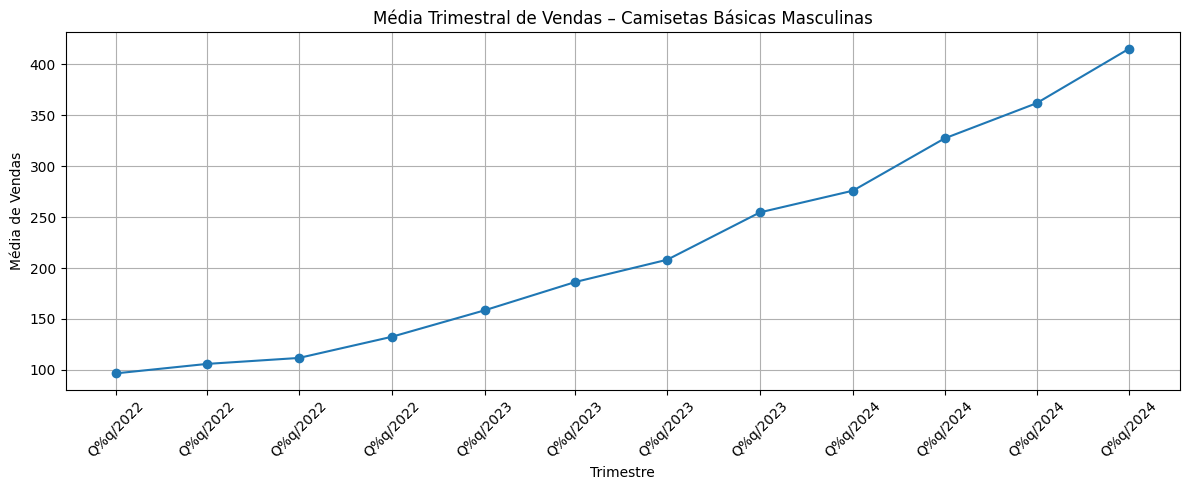

In [5]:
# =======================================
# 📊 Gráfico de média trimestral (sazonal)
# =======================================
from google.colab import files
import io, pandas as pd, chardet, matplotlib.pyplot as plt, matplotlib.dates as mdates

# --- 1. Upload do arquivo CSV ---------------------------
uploaded = files.upload()
nome_arquivo = next(iter(uploaded))
raw = uploaded[nome_arquivo]

# --- 2. Detectar encoding e separador -------------------
encoding = (chardet.detect(raw[:8000])['encoding']) or 'latin-1'
first_line = raw.split(b'\n', 1)[0].decode(encoding, errors='ignore')
sep = ',' if first_line.count(',') > first_line.count(';') else ';'

# --- 3. Ler o CSV ---------------------------------------
dados = pd.read_csv(io.BytesIO(raw), encoding=encoding, sep=sep)

# --- 4. Definir colunas ---------------------------------
col_data   = 'Timestamp'
col_vendas = 'Camisetas_básicas_masculinas'

# Converter Timestamp para datetime
dados[col_data] = pd.to_datetime(dados[col_data], dayfirst=True, errors='coerce')

# --- 5. Criar coluna de Quarter e calcular média --------
dados['Quarter'] = dados[col_data].dt.to_period('Q')

qt_media = (
    dados.dropna(subset=['Quarter', col_vendas])
         .groupby('Quarter', as_index=False)[col_vendas]
         .mean()
         .rename(columns={col_vendas: 'Media'})
         .sort_values('Quarter')
)

qt_media['Quarter_dt'] = qt_media['Quarter'].dt.to_timestamp(how='start')

# --- 6. Plot --------------------------------------------
plt.figure(figsize=(12,5))
plt.plot(qt_media['Quarter_dt'], qt_media['Media'],
         marker='o', linestyle='-')
plt.title('Média Trimestral de Vendas – Camisetas Básicas Masculinas')
plt.xlabel('Trimestre')
plt.ylabel('Média de Vendas')
plt.grid(True)

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[1,4,7,10]))
ax.xaxis.set_major_formatter(mdates.DateFormatter('Q%q/%Y'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

